<a href="https://colab.research.google.com/github/SuperShekS/machine-learning/blob/main/Moores%20law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using Linear Regression to prove Moore's law


In [16]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

In [38]:
data = pd.read_csv('moore.csv', header = None).values
X = data[:, 0].reshape(-1, 1)
Y = data[:, 1]

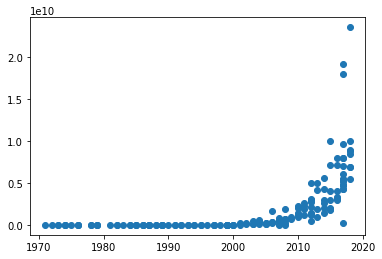

In [39]:
plt.scatter(X, Y)

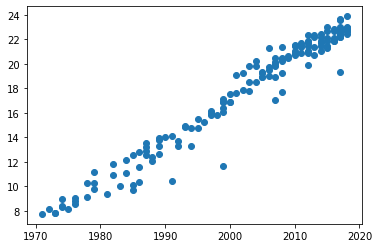

In [40]:
Y = np.log(Y)
plt.scatter(X, Y)

In [41]:
X = X - X.mean()

In [42]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(1,)),
        tf.keras.layers.Dense(1)
])

model.compile(optimizer = tf.keras.optimizers.SGD(0.001, 0.9), loss = 'mse')

#learning rate scheduler
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001


scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

#train the model 
r = model.fit(X, Y, epochs = 200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 319.0673
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 320.5627
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 274.7825
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 250.7560
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 188.0683
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 123.0765
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 86.5471
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 65.0339
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 56.5295
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 39.4122
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 26.0603
Epoch 12/200
6/6 [==============================] - 0s 2ms/step - loss: 29.4300
Epoch 13/200
6/6 [=========================

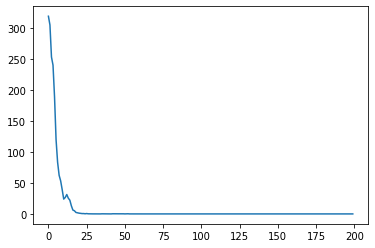

In [43]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

In [44]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.336388]], dtype=float32), array([17.773594], dtype=float32)]


In [46]:
a = model.layers[0].get_weights()[0][0,0]
print(a)

0.336388


In [47]:
print("Time to double:", np.log(2) / a)

Time to double: 2.0605586324117677


In [48]:
# If you know the analytical solution
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)
print("Time to double:", np.log(2) / a) 

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204


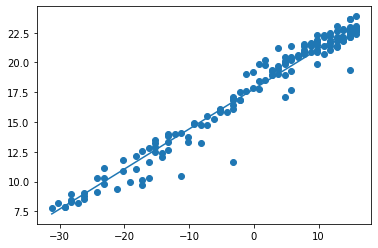

In [49]:
# Making the line fit

Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [50]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because it is flattened
X = X.reshape(-1, 1)

# (N X 1) x (1 X 1) + (1) -->  (N X 1)
Yhat2 = (X.dot(w) + b).flatten()

np.allclose(Yhat, Yhat2)

True